## IMDb Data Analysis
Exploring movie data using SQL and Python visualizations. 

## Setup & Data Connection
Importing necessary libraries and connecting to the IMDb database. 

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('imdb_movies.db')

# Check available tables
print("Available tables:")
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

Available tables:


,name
0,movie_metadata


In [3]:
## Reduce Spacing

from IPython.core.display import HTML

HTML("<style>.jp-RenderedHTMLCommon { margin-bottom: 5px !important; }</style>")

In [4]:
print("\nPreview of movie_metadata table:")
pd.read_sql_query("SELECT * FROM movie_metadata LIMIT 5;", conn)


Preview of movie_metadata table:


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,None,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,None,None,None,NaN,NaN,12.0,7.1,NaN,0


## AI Prompt Category Descriptons 

In [5]:
prompt_categories = [
    "Data Overview",
    "Trend Analysis",
    "Ranking Insights",
    "Comparative Analysis",
    "Anomaly Detection",
    "Recommendation Logic"
]

print("AI Prompt Categories Loaded:")
for category in prompt_categories:
    print(f"- {category}")

AI Prompt Categories Loaded:
- Data Overview
- Trend Analysis
- Ranking Insights
- Comparative Analysis
- Anomaly Detection
- Recommendation Logic


## 1. Top 10 Movies by IMDb Score
Returns highest-rated movies from the dataset.
Category: **Ranking Insights**

In [5]:
query1 = '''
SELECT movie_title, imdb_score
FROM movie_metadata
WHERE imdb_score IS NOT NULL
ORDER BY imdb_score DESC
LIMIT 10;
'''

top_movies_df = pd.read_sql_query(query1, conn)
top_movies_df

,movie_title,imdb_score
0,Towering Inferno,9.5
1,The Shawshank Redemption,9.3
2,The Godfather,9.2
3,Dekalog,9.1
4,Dekalog,9.1
5,Kickboxer: Vengeance,9.1
6,The Dark Knight,9.0
7,The Godfather: Part II,9.0
8,Fargo,9.0
9,The Lord of the Rings: The Return of the King,8.9


## Visualization: 

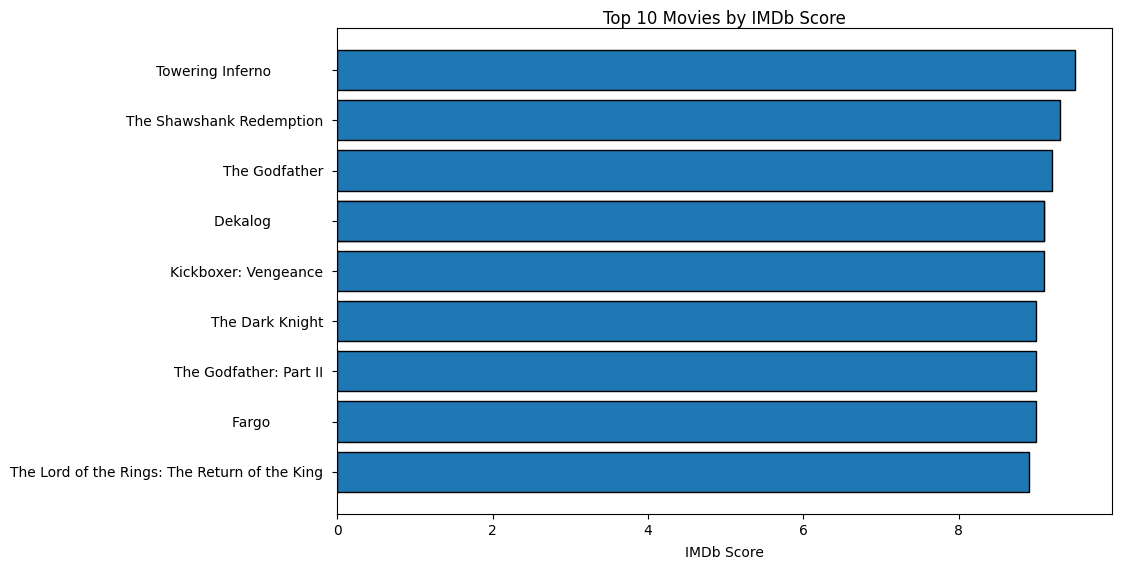

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(top_movies_df['movie_title'], top_movies_df['imdb_score'], edgecolor='black')
plt.xlabel('IMDb Score', labelpad=6)
plt.title('Top 10 Movies by IMDb Score', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout
plt.show()

## 2. Most Common Movie Genres 
A count of most frequently occurring genres in the dataset. 
Category: **Data Overview**

In [7]:
query2 = '''
SELECT genres, COUNT(*) AS genre_count
FROM movie_metadata
WHERE genres IS NOT NULL
GROUP BY genres
ORDER BY genre_count DESC
LIMIT 10;
'''

genre_counts_df = pd.read_sql_query(query2, conn)
genre_counts_df

,genres,genre_count
0,Drama,236
1,Comedy,209
2,Comedy|Drama,191
3,Comedy|Drama|Romance,187
4,Comedy|Romance,158
5,Drama|Romance,152
6,Crime|Drama|Thriller,101
7,Horror,71
8,Action|Crime|Drama|Thriller,68
9,Action|Crime|Thriller,65


## Visualization: Most Common Genres.

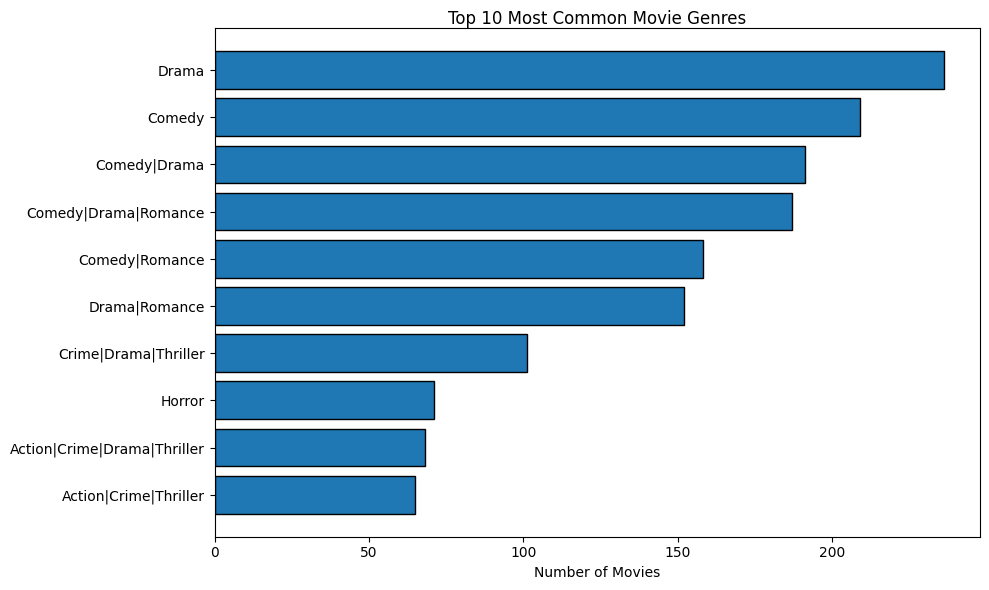

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(genre_counts_df['genres'], genre_counts_df['genre_count'], edgecolor='black')
plt.xlabel('Number of Movies')
plt.title('Top 10 Most Common Movie Genres', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

## 3. Top Directors by Average IMDb Score

In [9]:
query3 = '''
SELECT director_name, COUNT(*) AS movie_count, AVG(imdb_score) AS avg_score
FROM movie_metadata
WHERE director_name IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY director_name
HAVING movie_count >= 5
ORDER BY avg_score DESC
LIMIT 10;
'''

top_directors_df = pd.read_sql_query(query3, conn)
top_directors_df

,director_name,movie_count,avg_score
0,Christopher Nolan,8,8.425000
1,Quentin Tarantino,8,8.200000
2,Frank Capra,5,8.060000
3,Stanley Kubrick,7,8.000000
4,James Cameron,7,7.914286
5,Alejandro G. Iñárritu,6,7.783333
6,Fred Zinnemann,5,7.760000
7,David Fincher,10,7.750000
8,Peter Jackson,12,7.675000
9,Martin Scorsese,20,7.660000


## Visualization: Directors by Avg IMDb Score 

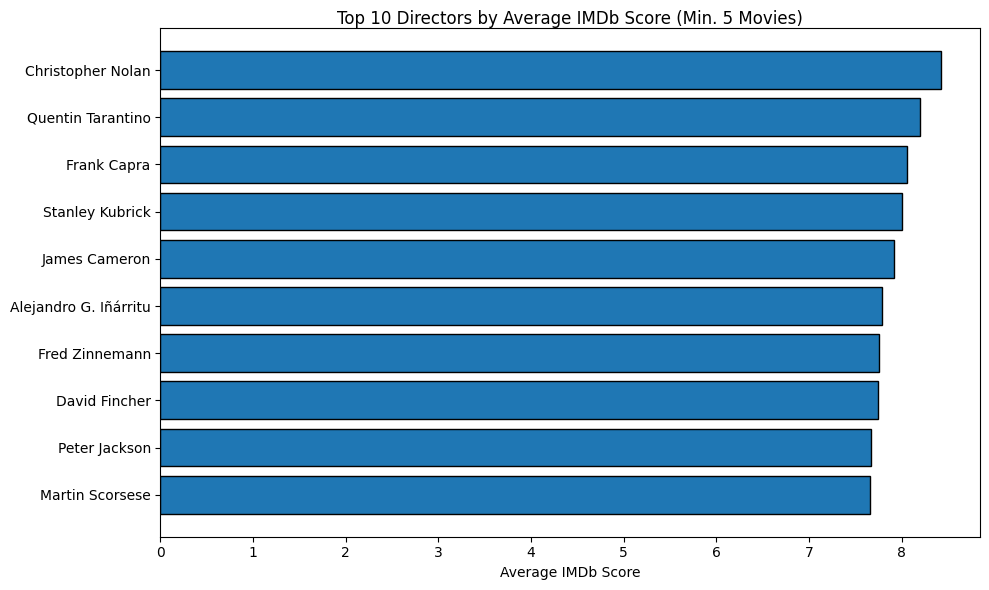

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(top_directors_df['director_name'], top_directors_df['avg_score'], edgecolor='black')
plt.xlabel('Average IMDb Score')
plt.title('Top 10 Directors by Average IMDb Score (Min. 5 Movies)', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

## 4. Movie Count Over Time

In [11]:
query4 = '''
SELECT title_year AS year, COUNT(*) AS movie_count
FROM movie_metadata
WHERE title_year IS NOT NULL
GROUP BY year
ORDER BY year ASC;
'''

movies_per_year_df = pd.read_sql_query(query4, conn)
movies_per_year_df

,year,movie_count
0,1916.0,1
1,1920.0,1
2,1925.0,1
3,1927.0,1
4,1929.0,2
...,...,...
86,2012.0,221
87,2013.0,237
88,2014.0,252
89,2015.0,226


## Visualization: Movie Count Over Time 

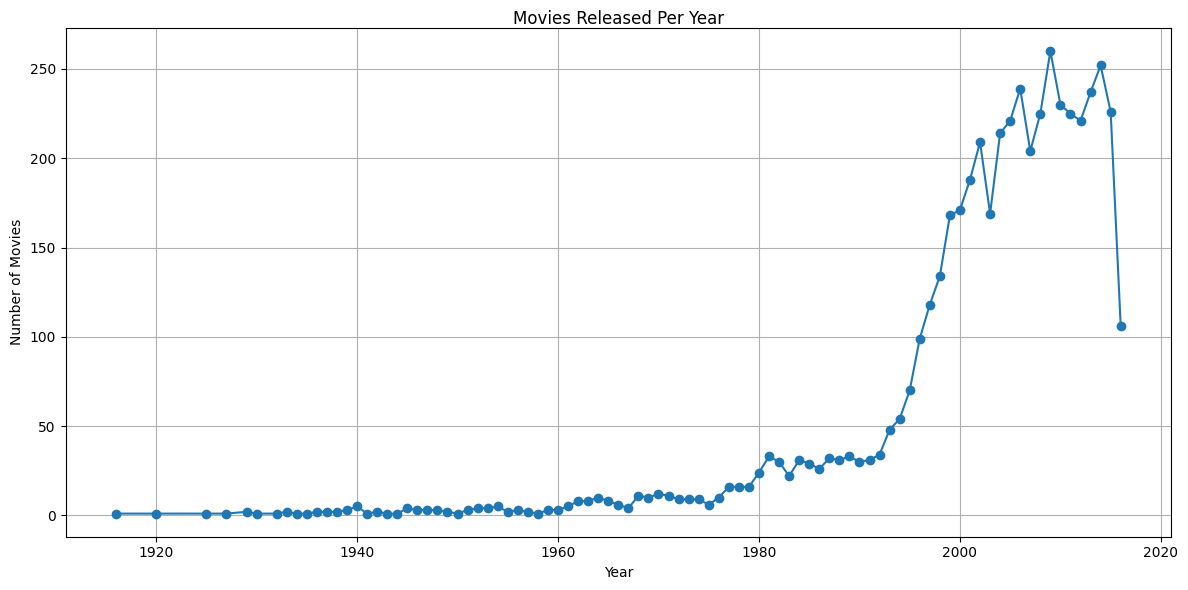

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year_df['year'], movies_per_year_df['movie_count'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Released Per Year', pad=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## 5. Highest-Grossing Movies

In [13]:
query5 = '''
SELECT movie_title, title_year, gross
FROM movie_metadata
WHERE gross IS NOT NULL
ORDER BY gross DESC
LIMIT 10;
'''

top_grossing_df = pd.read_sql_query(query5, conn)
top_grossing_df

,movie_title,title_year,gross
0,Avatar,2009.0,760505847.0
1,Titanic,1997.0,658672302.0
2,Jurassic World,2015.0,652177271.0
3,The Avengers,2012.0,623279547.0
4,The Avengers,2012.0,623279547.0
5,The Dark Knight,2008.0,533316061.0
6,Star Wars: Episode I - The Phantom Menace,1999.0,474544677.0
7,Star Wars: Episode IV - A New Hope,1977.0,460935665.0
8,Avengers: Age of Ultron,2015.0,458991599.0
9,The Dark Knight Rises,2012.0,448130642.0


## Visualization: Highest-Grossing Movies.

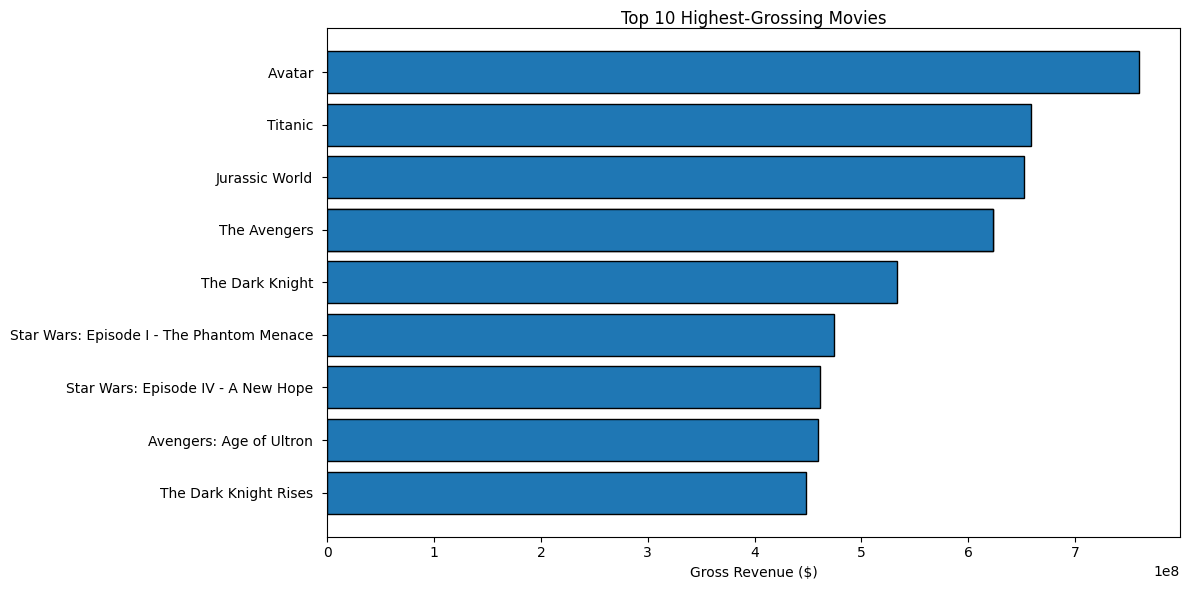

In [14]:
plt.figure(figsize=(12, 6))
plt.barh(top_grossing_df['movie_title'], top_grossing_df['gross'], edgecolor='black')
plt.xlabel('Gross Revenue ($)')
plt.title('Top 10 Highest-Grossing Movies', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

## 6. Top Actors by Facebook Likes

In [15]:
query6 = '''
SELECT actor_1_name, MAX(actor_1_facebook_likes) AS fb_likes
FROM movie_metadata
WHERE actor_1_name IS NOT NULL AND actor_1_facebook_likes IS NOT NULL
GROUP BY actor_1_name
ORDER BY fb_likes DESC
LIMIT 10;
'''

top_actors_df = pd.read_sql_query(query6, conn)
top_actors_df

,actor_1_name,fb_likes
0,Darcy Donavan,640000.0
1,Matthew Ziff,260000.0
2,Krista Allen,164000.0
3,Andrew Fiscella,137000.0
4,Jimmy Bennett,87000.0
5,Michael Joiner,77000.0
6,Robin Williams,49000.0
7,Craig Stark,46000.0
8,Muse Watson,45000.0
9,Tim Holmes,44000.0


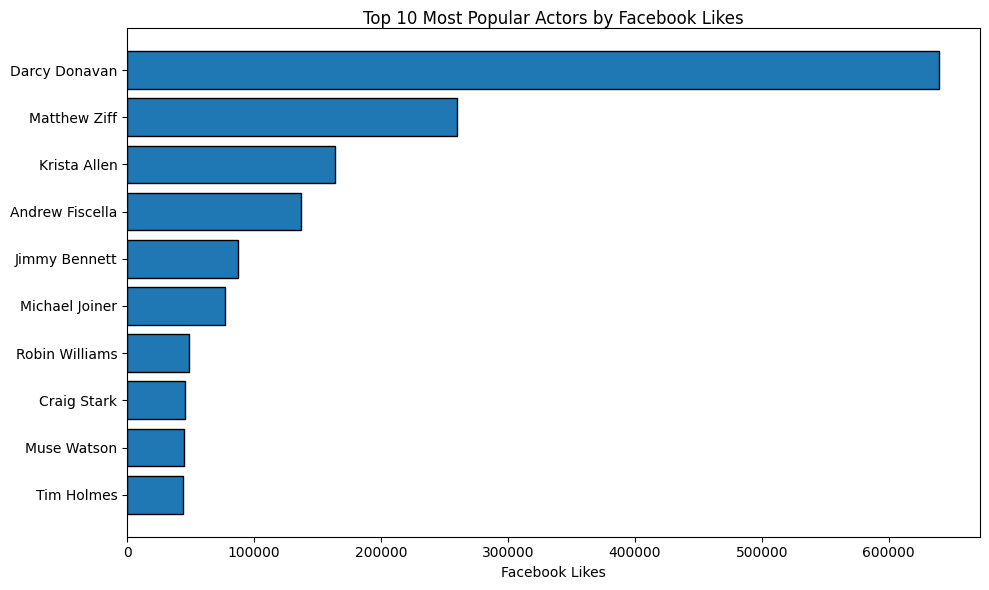

In [16]:
plt.figure(figsize=(10, 6))
plt.barh(top_actors_df['actor_1_name'], top_actors_df['fb_likes'], edgecolor='black')
plt.xlabel('Facebook Likes')
plt.title('Top 10 Most Popular Actors by Facebook Likes', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

## 7. Top 10 Longest Movies

In [10]:
query7 = '''
SELECT movie_title, duration
FROM movie_metadata
WHERE duration IS NOT NULL
ORDER BY duration DESC
LIMIT 10;
'''

longest_movies_df = pd.read_sql_query(query7, conn)
longest_movies_df

,movie_title,duration
0,Trapped,511.0
1,Carlos,334.0
2,"Blood In, Blood Out",330.0
3,Heaven's Gate,325.0
4,The Legend of Suriyothai,300.0
5,Das Boot,293.0
6,Apocalypse Now,289.0
7,The Company,286.0
8,Gods and Generals,280.0
9,Gettysburg,271.0


## Visualization: Top 10 Longest Movies 

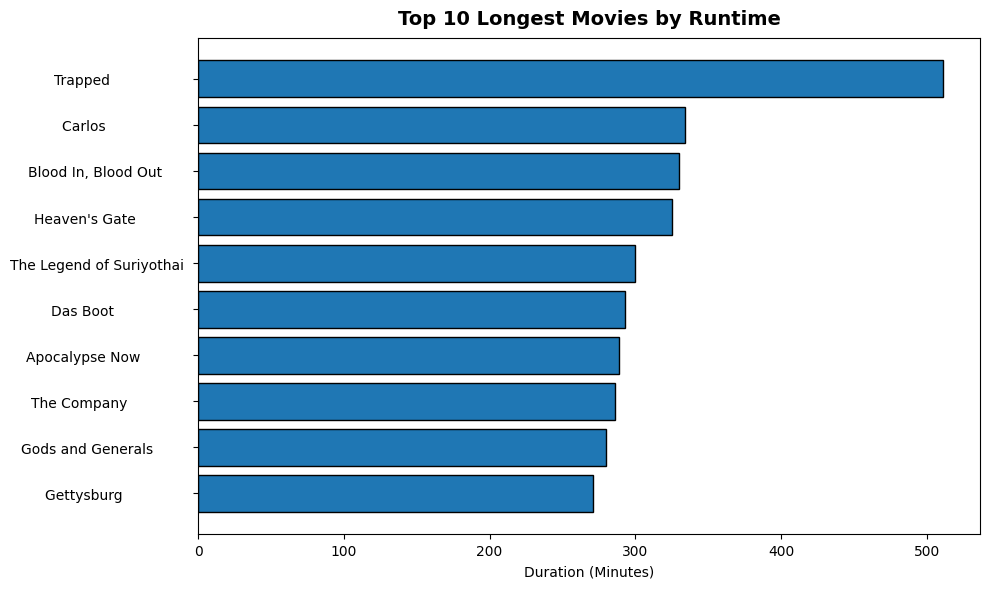

In [20]:
longest_title_length = longest_movies_df['movie_title'].str.len().max()
longest_movies_df['padded_title'] = longest_movies_df['movie_title'].apply(
    lambda x: x.ljust(longest_title_length)
)

plt.figure(figsize = (10, 6))
plt.barh(longest_movies_df['padded_title'], longest_movies_df['duration'], edgecolor = 'black')

plt.xlabel('Duration (Minutes)', labelpad = 5)
plt.title('Top 10 Longest Movies by Runtime', fontsize = 14, weight = 'bold', pad = 10)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Average IMDb Score by Genre

In [19]:
query8 = '''
SELECT genres, AVG(imdb_score) AS avg_score
FROM movie_metadata
WHERE genres IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY genres
ORDER BY avg_score DESC
LIMIT 10;
'''

avg_score_genre_df = pd.read_sql_query(query8, conn)
avg_score_genre_df

,genres,avg_score
0,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8
1,Action|Adventure|Biography|Drama|History,8.6
2,Crime|Drama|Fantasy|Mystery,8.5
3,Adventure|Animation|Drama|Family|Musical,8.5
4,Action|Drama|History|Thriller|War,8.5
5,Comedy|Drama|History|Romance,8.4
6,Adventure|Drama|Thriller|War,8.4
7,Action|Animation|Crime|Sci-Fi|Thriller,8.4
8,Action|Adventure|Drama|Fantasy|War,8.4
9,Documentary|Drama|Sport,8.3


## Visualization: Average IMDb Score by Genre

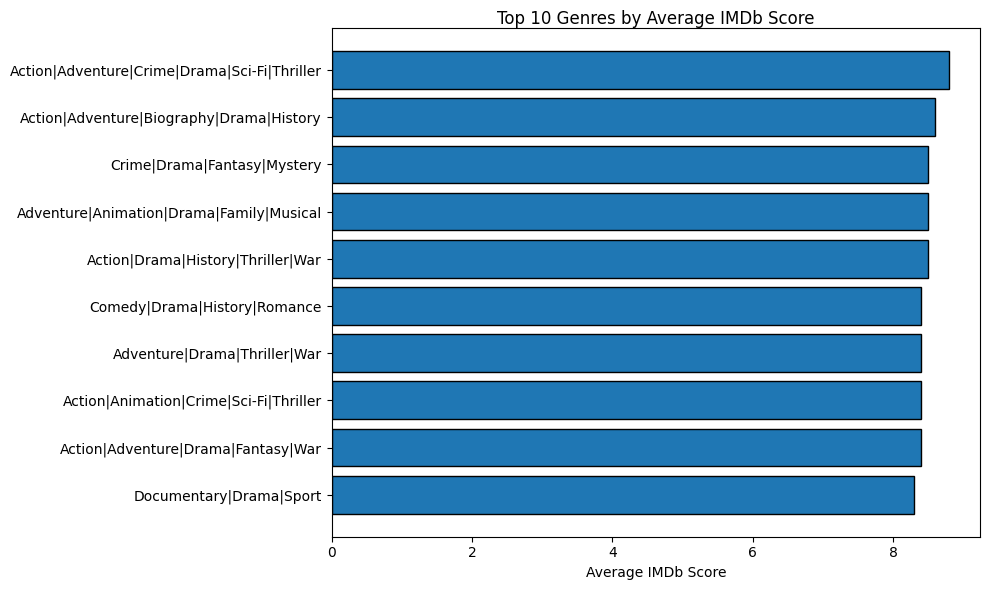

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(avg_score_genre_df['genres'], avg_score_genre_df['avg_score'], edgecolor='black')
plt.xlabel('Average IMDb Score')
plt.title('Top 10 Genres by Average IMDb Score', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

## 9. Average Movie Duration by Genre

In [7]:
query9 = '''
SELECT genres, AVG(duration) AS avg_duration
FROM movie_metadata
WHERE genres IS NOT NULL AND duration IS NOT NULL
GROUP BY genres
ORDER BY avg_duration DESC
LIMIT 10;
'''

avg_duration_genre_df = pd.read_sql_query(query9, conn)
avg_duration_genre_df

,genres,avg_duration
0,Adventure|Drama|Thriller|War,293.0
1,Adventure|Biography|Crime|Drama|Western,212.0
2,Action|Adventure|Biography|Drama|History|Roman...,206.0
3,Action|Adventure|Drama|Romance|War,193.5
4,Crime|Drama|Fantasy|Mystery,189.0
5,Adventure|Drama|Western,188.0
6,Action|Adventure|Drama|Romance|Sci-Fi,188.0
7,Crime|Drama|Mystery|Thriller|Western,187.0
8,Adventure|Drama|History|War,184.0
9,Biography|Drama|History|Music,180.0


## Visualization: Avg Movie Duration by Genre 

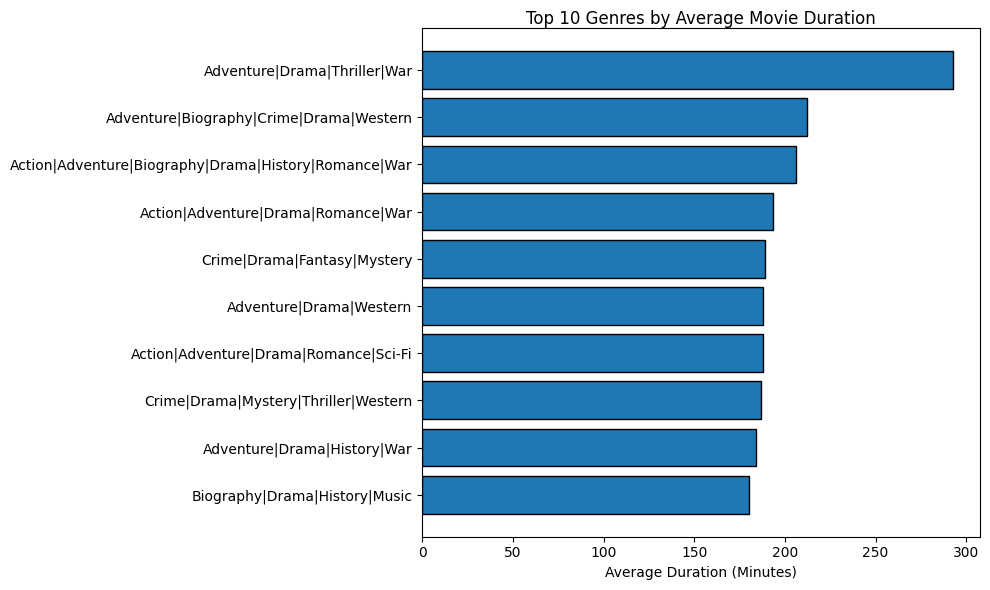

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(avg_duration_genre_df['genres'], avg_duration_genre_df['avg_duration'], edgecolor='black')
plt.xlabel('Average Duration (Minutes)')
plt.title('Top 10 Genres by Average Movie Duration', pad=2)
plt.gca().invert_yaxis()
plt.subplots_adjust(top=0.92)
plt.tight_layout()
plt.show()

## 10. Average IMDb Score by Year

In [23]:
query10 = '''
SELECT title_year AS year, AVG(imdb_score) AS avg_score
FROM movie_metadata
WHERE title_year IS NOT NULL AND imdb_score IS NOT NULL
GROUP BY year
ORDER BY year ASC;
'''

avg_score_year_df = pd.read_sql_query(query10, conn)
avg_score_year_df

,year,avg_score
0,1916.0,8.000000
1,1920.0,4.800000
2,1925.0,8.300000
3,1927.0,8.300000
4,1929.0,7.150000
...,...,...
86,2012.0,6.266516
87,2013.0,6.369620
88,2014.0,6.228175
89,2015.0,6.033628


## Visualization: Line Chart of IMDb Score Over Time. 

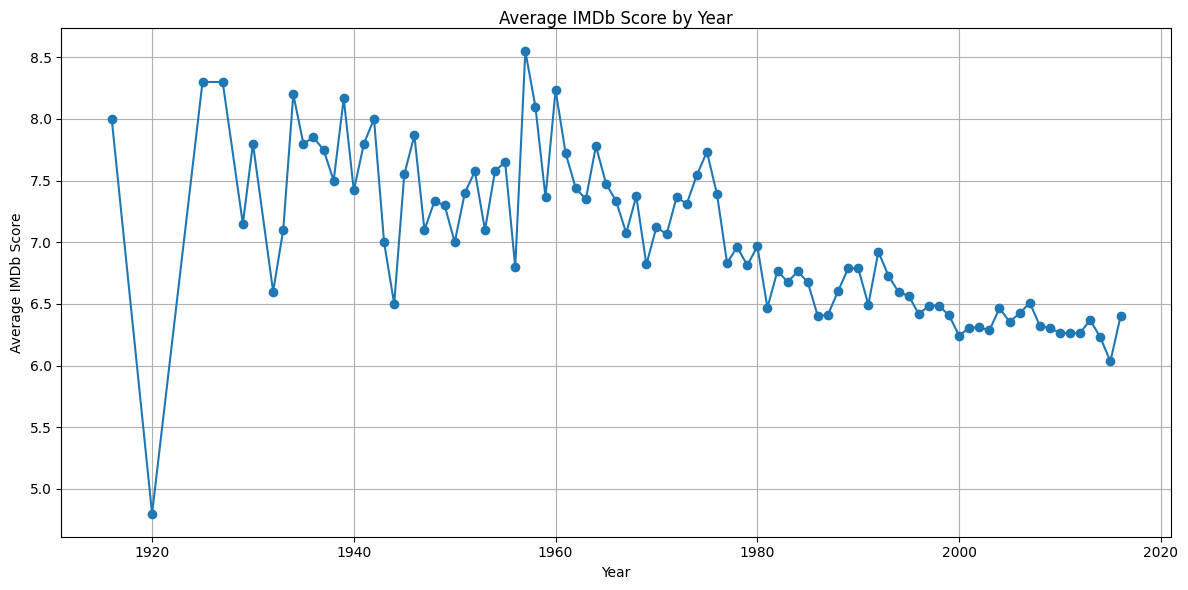

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(avg_score_year_df['year'], avg_score_year_df['avg_score'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Year', pad=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## 11. Correlation Between IMDb Score & Gross Revenue

In [25]:
query11 = '''
SELECT imdb_score, gross
FROM movie_metadata
WHERE imdb_score IS NOT NULL AND gross IS NOT NULL;
'''

score_gross_df = pd.read_sql_query(query11, conn)
score_gross_df

,imdb_score,gross
0,7.9,760505847.0
1,7.1,309404152.0
2,6.8,200074175.0
3,8.5,448130642.0
4,6.6,73058679.0
...,...,...
4154,6.3,70071.0
4155,6.9,2040920.0
4156,6.4,4584.0
4157,6.3,10443.0


## Visualization: Scatter Plot Showing Score vs. Gross. 

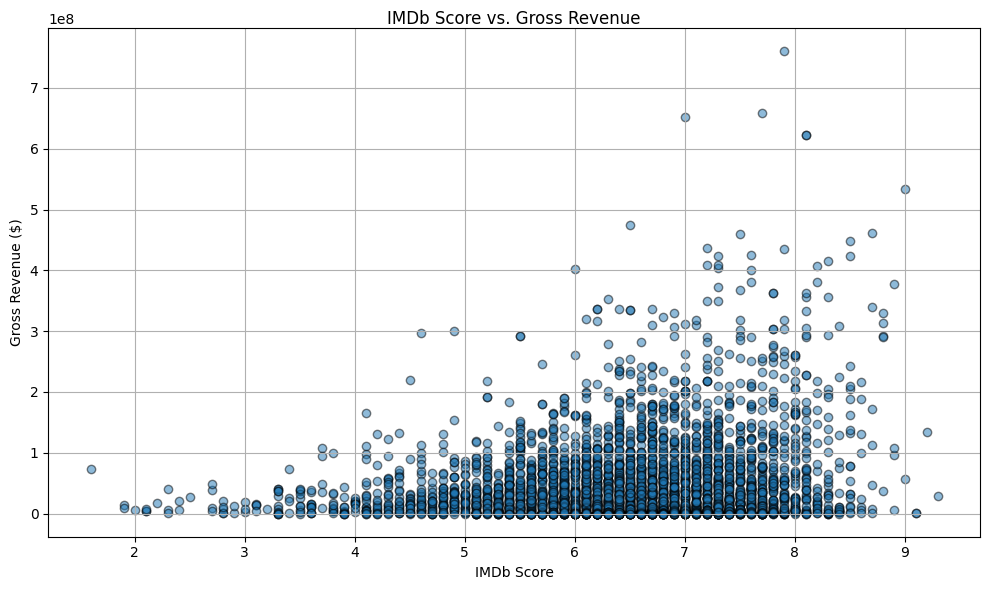

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(score_gross_df['imdb_score'], score_gross_df['gross'], alpha=0.5, edgecolor='black')
plt.xlabel('IMDb Score')
plt.ylabel('Gross Revenue ($)')
plt.title('IMDb Score vs. Gross Revenue', pad=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## 12a. Longest Titles - 

In [27]:
query_long = '''
SELECT movie_title, LENGTH(movie_title) AS title_length
FROM movie_metadata
WHERE movie_title IS NOT NULL
ORDER BY title_length DESC
LIMIT 10;
'''

long_titles_df = pd.read_sql_query(query_long, conn)
long_titles_df

,movie_title,title_length
0,30 Nights of Paranormal Activity with the Devi...,87
1,Borat: Cultural Learnings of America for Make ...,84
2,The 41-Year-Old Virgin Who Knocked Up Sarah Ma...,80
3,Everything You Always Wanted to Know About Sex...,72
4,Dr. Strangelove or: How I Learned to Stop Worr...,69
5,Once in a Lifetime: The Extraordinary Story of...,67
6,"The Chronicles of Narnia: The Lion, the Witch ...",63
7,"Alexander and the Terrible, Horrible, No Good,...",60
8,The Assassination of Jesse James by the Coward...,59
9,Deceptive Practice: The Mysteries and Mentors ...,59


## 12b. Shortest Titles - 

In [28]:
query_short = '''
SELECT movie_title
FROM movie_metadata
WHERE movie_title IS NOT NULL
'''

titles_df = pd.read_sql_query(query_short, conn)
titles_df

titles_df['clean_title'] = titles_df['movie_title'].str.strip().str.replace(r'\s+', '', regex=True)
titles_df['title_length'] = titles_df['clean_title'].str.len()

short_titles_df = titles_df.sort_values(by='title_length').head(10)[['movie_title', 'title_length']]
short_titles_df

,movie_title,title_length
4902,3,1
4504,Q,1
3729,O,1
1667,9,1
3064,O,1
1205,42,2
1870,W.,2
4919,H.,2
4973,Pi,2
3561,Go,2


## 13. Distribution of IMDb Scores

In [29]:
query13 = '''
SELECT imdb_score
FROM movie_metadata
WHERE imdb_score IS NOT NULL
'''

score_distribution_df = pd.read_sql_query(query13, conn)
score_distribution_df

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,7.1
...,...
5038,7.7
5039,7.5
5040,6.3
5041,6.3


## Visualization: Histogram of IMDb Score Distribution 

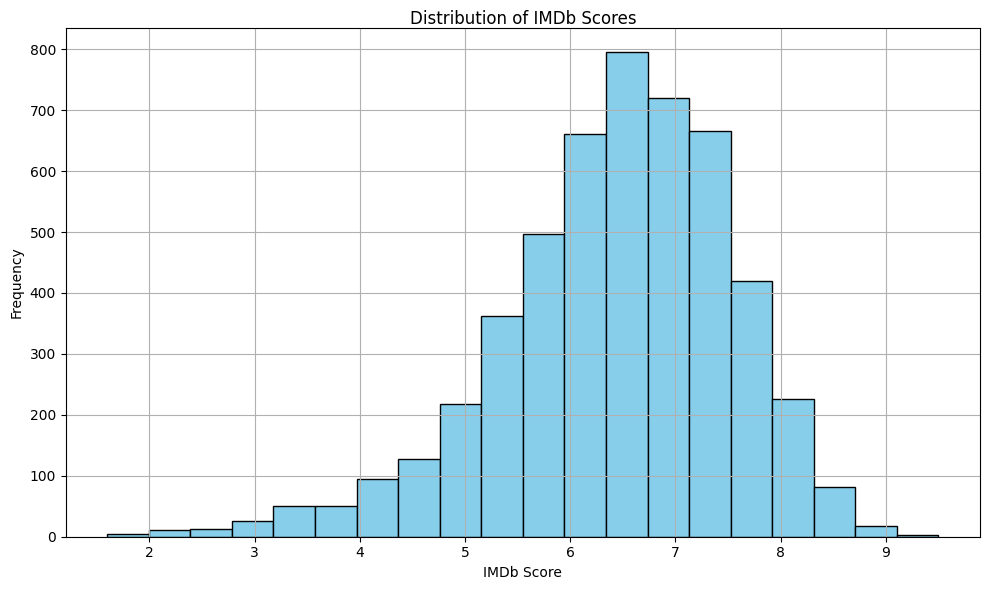

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(score_distribution_df['imdb_score'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores', pad=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## 14. Genre Popularity Over Time (Top Genres Only)

In [36]:
query14 = '''
WITH RECURSIVE genre_split AS (
    SELECT
        movie_title,
        title_year,
        TRIM(
           CASE
              WHEN INSTR(genres, '|') = 0 THEN genres
              ELSE SUBSTR(genres, 1, INSTR(genres, '|') - 1)
           END
        ) AS genre, 
        CASE
           WHEN INSTR(genres, '|') = 0 THEN ''
           ELSE SUBSTR(genres, INSTR(genres, '|') + 1)
        END AS rest
    FROM movie_metadata
    WHERE genres IS NOT NULL AND genres <> '' AND title_year IS NOT NULL

    UNION ALL

    SELECT
        movie_title,
        title_year,
        TRIM(
           CASE
              WHEN INSTR(rest, '|') = 0 THEN rest
              ELSE SUBSTR(rest, 1, INSTR(rest, '|') - 1)
           END
        ) AS genre, 
        CASE
           WHEN INSTR(rest, '|') = 0 THEN ''
           ELSE SUBSTR(rest, INSTR(rest, '|') + 1)
        END AS rest
    FROM genre_split
    WHERE rest <> ''
),
overall AS (
    SELECT genre, COUNT(*) AS total_count
    FROM genre_split
    GROUP BY genre
),
top_genres AS (
    SELECT genre
    FROM overall
    ORDER BY total_count DESC
    LIMIT 6
)
SELECT
    (title_year/10)*10 AS decade,
    gs.genre,
    COUNT(*) AS movie_count
FROM genre_split gs
JOIN top_genres t ON t.genre = gs.genre
WHERE gs.title_year BETWEEN 1970 AND 2025
GROUP BY decade, gs.genre
ORDER BY decade, gs.genre;
'''

genre_trends_df = pd.read_sql_query(query14, conn)
display(genre_trends_df)

,decade,genre,movie_count
0,1970.0,Action,4
1,1970.0,Adventure,1
2,1970.0,Comedy,5
3,1970.0,Drama,9
4,1970.0,Romance,2
...,...,...,...
273,2016.0,Adventure,33
274,2016.0,Comedy,31
275,2016.0,Drama,44
276,2016.0,Romance,11


## Visualization: Genre Popularity Over Time 

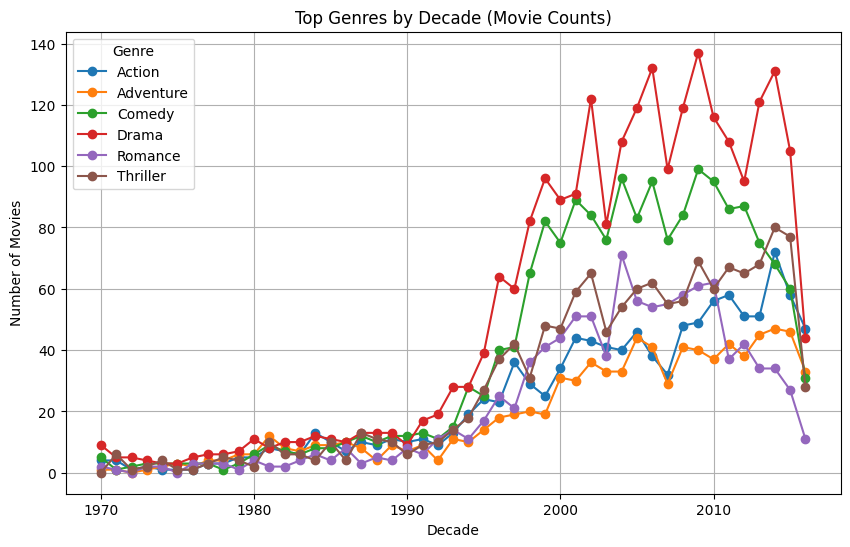

In [37]:
pivot_df = genre_trends_df.pivot(index = 'decade', columns = 'genre', values = 'movie_count').fillna(0)

pivot_df.plot(kind = 'line', marker = 'o', figsize = (10, 6))
plt.title('Top Genres by Decade (Movie Counts)')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.legend(title = 'Genre')
plt.grid(True)
plt.show()

## 15. Most Consistently High-Rated Directors with 3+ Films. 

In [40]:
query15 = '''
SELECT
    director_name, 
    COUNT(*) AS movie_count,
    ROUND(AVG(imdb_score), 2) AS avg_score 
FROM movie_metadata
WHERE director_name IS NOT NULL
GROUP BY director_name
HAVING movie_count >= 3
'''

directors_df = pd.read_sql_query(query15, conn)

scores_df = pd.read_sql_query("SELECT director_name, imdb_score FROM movie_metadata WHERE director_name IS NOT NULL", conn)
stddev_df = scores_df.groupby('director_name')['imdb_score'].std().reset_index(name = 'score_stddev')
directors_df = directors_df.merge(stddev_df, on = 'director_name')
directors_df = directors_df.sort_values(by = ['avg_score', 'score_stddev'], ascending = [False, True]).head(10)
display(directors_df)

,director_name,movie_count,avg_score,score_stddev
450,Sergio Leone,4,8.48,0.377492
77,Christopher Nolan,8,8.43,0.539179
373,Pete Docter,3,8.23,0.115470
166,Hayao Miyazaki,4,8.23,0.386221
389,Quentin Tarantino,8,8.20,0.424264
338,Milos Forman,3,8.13,0.665833
132,Frank Capra,5,8.06,0.477493
504,Tony Kaye,3,8.03,0.737111
96,David Lean,4,8.00,0.432049
463,Stanley Kubrick,7,8.00,0.443471


## Visual: Most Consistently High-Rated Directors with 3+ Movies. 

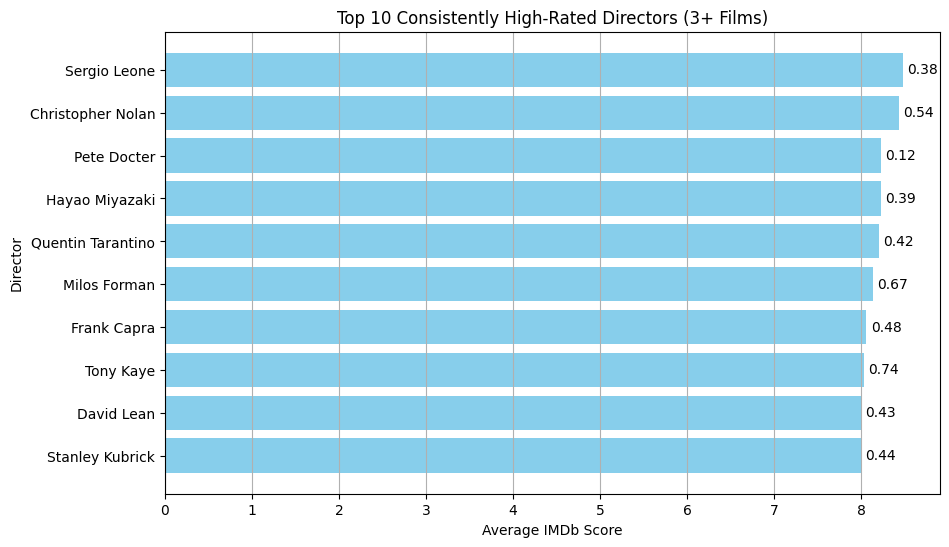

In [45]:
plt.figure(figsize = (10,6))
bars = plt.barh(directors_df['director_name'], directors_df['avg_score'], color = 'skyblue')
plt.xlabel('Average IMDb Score')
plt.ylabel('Director')
plt.title('Top 10 Consistently High-Rated Directors (3+ Films)')
plt.gca().invert_yaxis()

for bar, stddev in zip(bars, directors_df['score_stddev']):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f"{stddev:.2f}", va='center')
plt.grid(axis = 'x')
plt.show()